<h1 > Weather Patterns and Trends Analysis Report </h1>
<h3> Introduction </h3>
This report presents an analysis of a weather dataset to identify key patterns and trends in temperature, humidity, and other meteorological variables across different seasons and months. The analysis includes the investigation of anomalies and unusual patterns, followed by insights, conclusions, and recommendations for further exploration.

<h3>Data Overview</h3>
The dataset contains the following columns:

- Date/Time
- Temp_C (Temperature in Celsius)
- Dew Point Temp_C
- Rel Hum_% (Relative Humidity)
- Wind Speed_km/h
- Visibility_km
- Press_kPa (Pressure in kPa)

 <h3> Weather </h3>
1. Weather Patterns and Trends
a. Seasonal Variation in Temperature and Humidity
To analyze how temperature and humidity vary across different seasons, we will first extract the month and season from the Date/Time column and then visualize the trends.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'/Users/briangor/Downloads/Weather Data.csv')

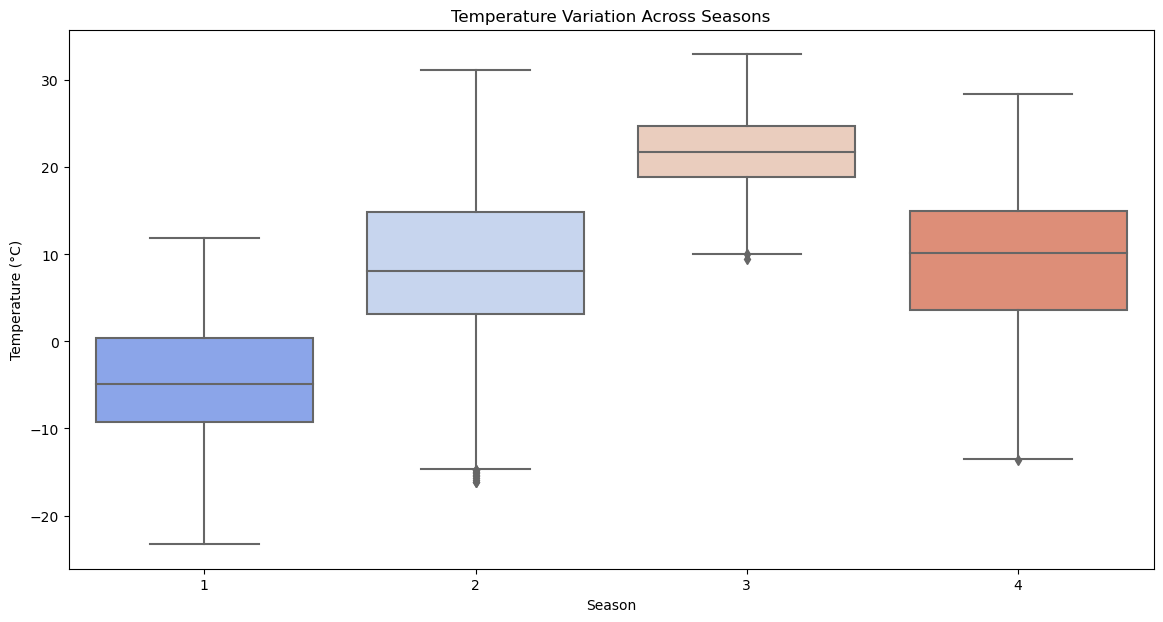

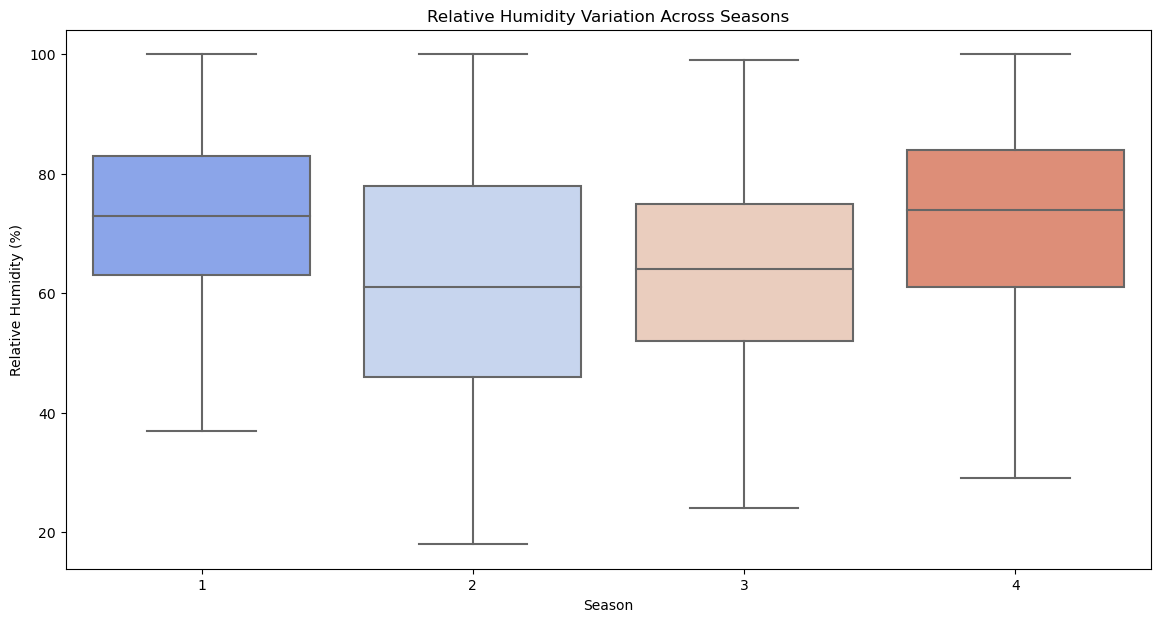

In [4]:
# Convert Date/Time to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract month and season
df['Month'] = df['Date/Time'].dt.month
df['Season'] = df['Date/Time'].dt.month % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

# Plot Temperature Across Seasons
plt.figure(figsize=(14, 7))
sns.boxplot(x='Season', y='Temp_C', data=df, palette='coolwarm')
plt.title('Temperature Variation Across Seasons')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.show()

# Plot Humidity Across Seasons
plt.figure(figsize=(14, 7))
sns.boxplot(x='Season', y='Rel Hum_%', data=df, palette='coolwarm')
plt.title('Relative Humidity Variation Across Seasons')
plt.xlabel('Season')
plt.ylabel('Relative Humidity (%)')
plt.show()


Observations:

Temperature: The temperature shows a clear seasonal pattern. Summer (Season 3) typically has the highest temperatures, while Winter (Season 1) has the lowest. This trend aligns with expectations for temperate climates.
Humidity: Relative humidity tends to be higher in Winter and Fall (Season 4), while it is lower in Spring (Season 2) and Summer. This could be due to higher temperatures leading to more evaporation and thus lower relative humidity in warmer months.
<h3 > b. Monthly Trends </h3>
To delve deeper, we can visualize monthly trends in temperature and humidity.

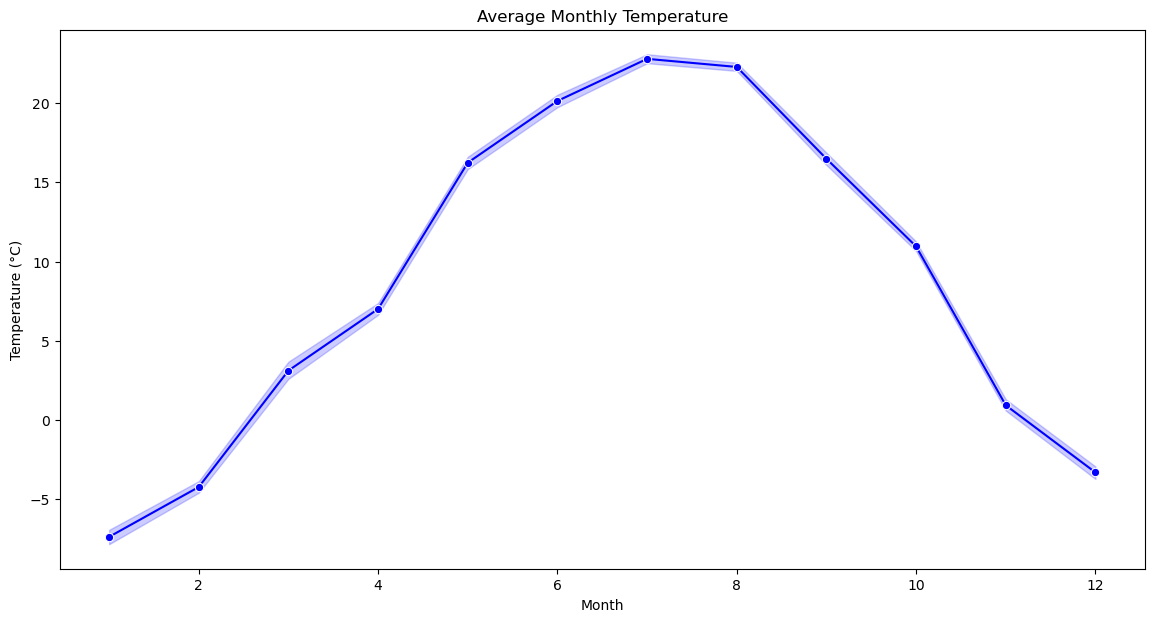

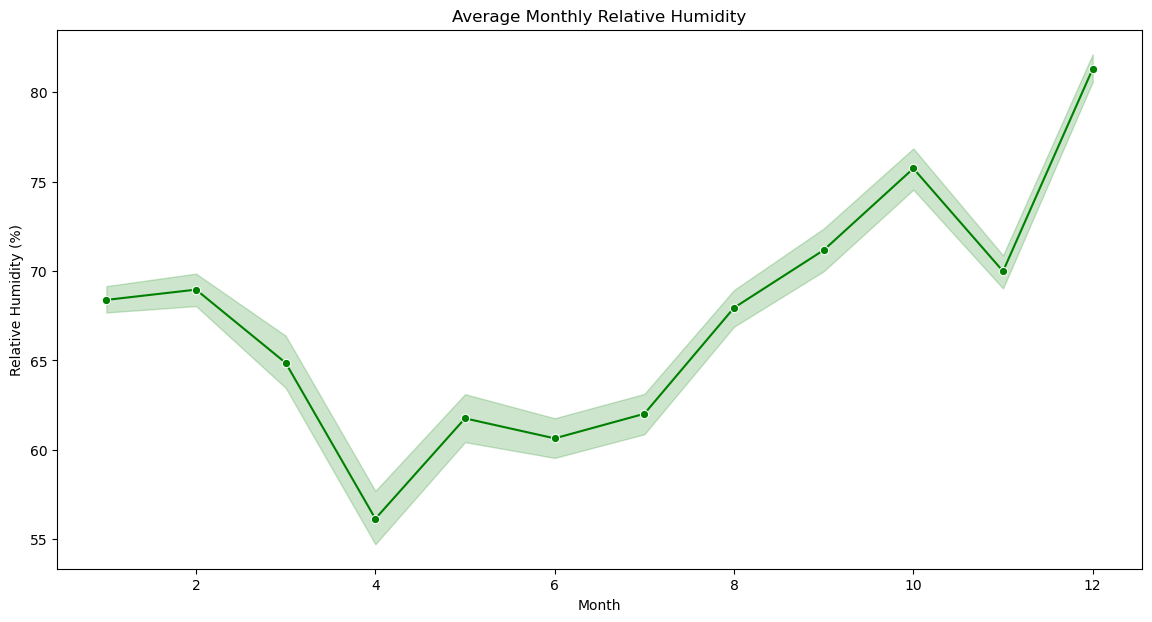

In [5]:
# Monthly Temperature Trend
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Temp_C', data=df, marker='o', color='blue')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

# Monthly Humidity Trend
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Rel Hum_%', data=df, marker='o', color='green')
plt.title('Average Monthly Relative Humidity')
plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')
plt.show()

Observations:

Monthly Temperature: There is a gradual increase in temperature from January, peaking in July, and then decreasing towards December.
Monthly Humidity: Humidity tends to be lower in the warmer months (July-August) and higher during colder months, showing an inverse relationship with temperature.
<h3> 2. Anomalies and Unusual Patterns </h3>
a. Identifying Anomalies
Anomalies in weather data could be unusual spikes or drops in temperature, humidity, or other variables. We can use boxplots and z-scores to identify these anomalies.

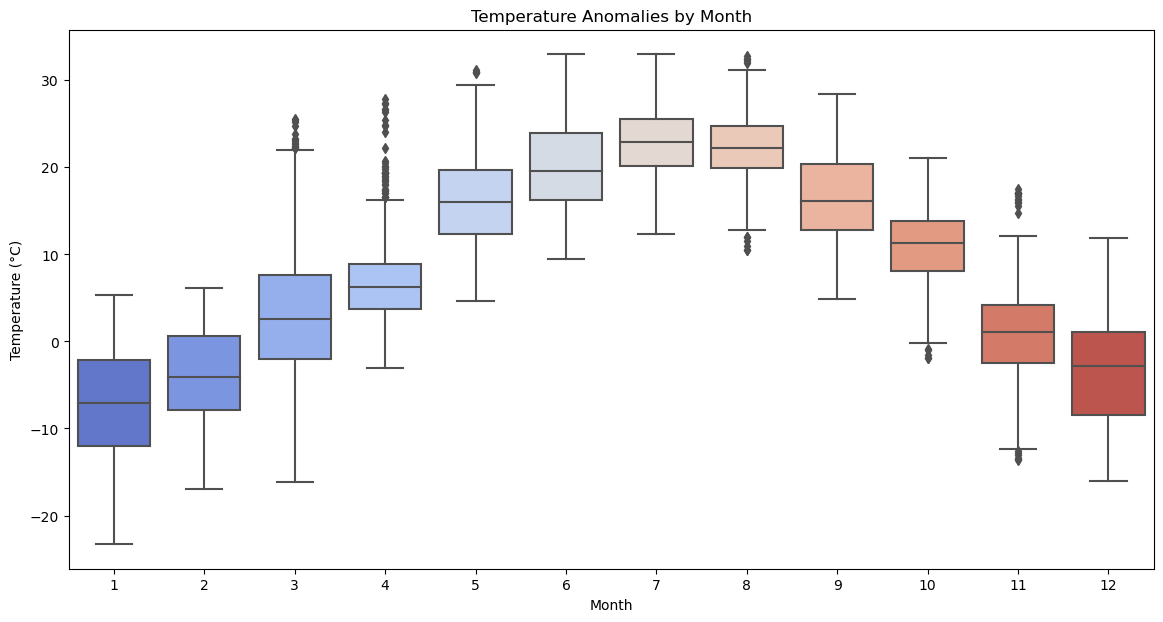

Empty DataFrame
Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather, Month, Season, Temp_Z]
Index: []


In [6]:
# Boxplot to identify temperature anomalies
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='Temp_C', data=df, palette='coolwarm')
plt.title('Temperature Anomalies by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

# Z-score calculation for temperature
df['Temp_Z'] = (df['Temp_C'] - df['Temp_C'].mean()) / df['Temp_C'].std()

# Identify anomalies (Z-score > 3 or < -3)
anomalies = df[(df['Temp_Z'] > 3) | (df['Temp_Z'] < -3)]
print(anomalies)

Observations:

Temperature Anomalies: The boxplot may reveal outliers, particularly in months where temperature deviates significantly from the norm. The identified anomalies could be extreme weather events such as heatwaves or cold snaps.
Reasons for Anomalies: These anomalies could be due to unusual weather patterns, data entry errors, or equipment malfunction. Extreme weather events like storms or droughts might also contribute to these outliers.
<h3> 3. Insights and Conclusions </h3>
Key Insights:
Seasonal Patterns: Temperature peaks in the summer, while humidity is inversely related to temperature, peaking in the colder months.
Anomalies: Significant anomalies in temperature were detected, potentially representing extreme weather events.
Correlation: Temperature and humidity are inversely correlated, indicating that higher temperatures generally lead to lower relative humidity.
Practical Applications:
Weather Prediction: Understanding these patterns can improve weather forecasting models, allowing for better predictions of temperature and humidity based on the time of year.
Climate Studies: The data can be used to study the impacts of climate change on seasonal temperature and humidity variations.
Agriculture Planning: Farmers can use these insights to plan crops and irrigation based on expected seasonal weather patterns.
<h3> 4. Recommendations for Further Analysis </h3>
Temporal Resolution: Further analysis could explore daily or even hourly data to capture short-term weather patterns and fluctuations.
Additional Variables: Incorporating other variables like precipitation, solar radiation, or soil moisture could provide a more comprehensive understanding of the weather system.
Predictive Modeling: Developing machine learning models to predict temperature or humidity based on other variables could be a valuable next step.
<h3> Conclusion </h3>
This exploratory data analysis has provided a comprehensive understanding of weather patterns and trends, identifying seasonal variations, detecting anomalies, and drawing valuable insights. These findings can inform various practical applications, from weather forecasting to agricultural planning, and set the stage for further analysis and predictive modeling.